In [8]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

In [9]:
url = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/visualisations/listings.csv'

In [10]:
df = pd.read_csv(url, sep=',')

In [6]:
print(df.head())

     id                                               name  host_id  \
0   958                Bright, Modern Garden Unit - 1BR/1B     1169   
1  5858                                 Creative Sanctuary     8904   
2  7918         A Friendly Room - UCSF/USF - San Francisco    21994   
3  8014      Newly Remodeled room in big house WIFI market    22402   
4  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   

          host_name  neighbourhood_group     neighbourhood   latitude  \
0             Holly                  NaN  Western Addition  37.769310   
1  Philip And Tania                  NaN    Bernal Heights  37.745112   
2             Aaron                  NaN    Haight Ashbury  37.766690   
3               Jia                  NaN     Outer Mission  37.730746   
4             Aaron                  NaN    Haight Ashbury  37.764872   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.433856  Entire home/apt    170               1     

In [47]:
df_bydistrict = df['neighbourhood'].value_counts(dropna=False)

In [48]:
import matplotlib.pyplot as plt

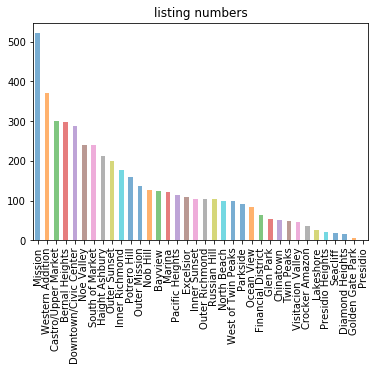

In [58]:
df_bydistrict.plot(kind='bar', title = 'listing numbers', alpha = 0.6)

In [ ]:
# Listing number changes with time

In [61]:
df_roomtype = df['room_type'].value_counts(dropna=False)

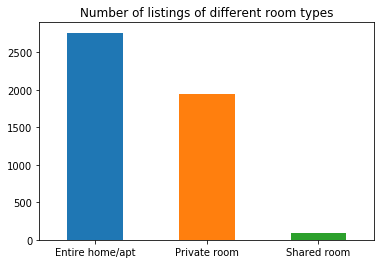

In [139]:
df_roomtype.plot(kind='bar',title = 'Number of listings of different room types', rot=0)

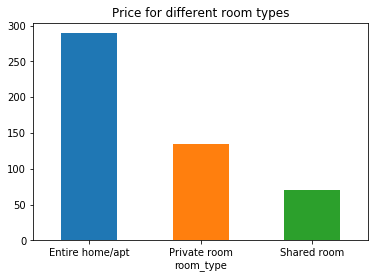

In [138]:
df.groupby('room_type')['price'].mean().plot(kind='bar', title = 'Price for different room types', rot=0)
# Conclusion: The price for entire homes is highest, and price for shared rooms is lowest.

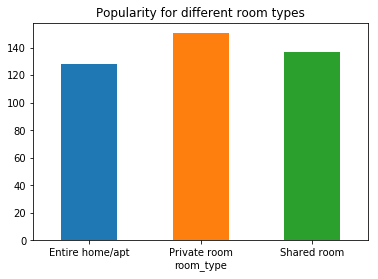

In [140]:
df.groupby('room_type')['availability_365'].mean().plot(kind='bar', title = 'Availability for different room types', rot=0)

In [128]:
df['neighbourhood_group'].value_counts(dropna=False)

NaN    4804
Name: neighbourhood_group, dtype: int64

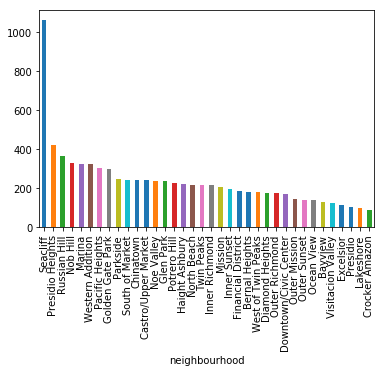

In [112]:
nh_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
nh_price.plot(kind='bar')

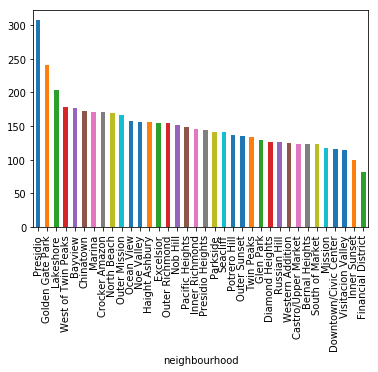

In [119]:
# This shows the popularity of different neighbourhoods in San Francisco
nh_avail = df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False)
nh_avail.plot(kind='bar')

In [121]:
price_avail = pd.concat([nh_price, nh_avail], axis = 1)
price_avail

,price,availability_365
Bayview,127.284553,175.975610
Bernal Heights,178.662207,123.789298
Castro/Upper Market,238.920266,124.039867
Chinatown,241.686275,172.627451
Crocker Amazon,88.742857,170.685714
Diamond Heights,177.000000,126.562500
Downtown/Civic Center,170.197917,115.298611
Excelsior,114.333333,155.101852
Financial District,183.761905,81.380952
Glen Park,235.169811,129.622642


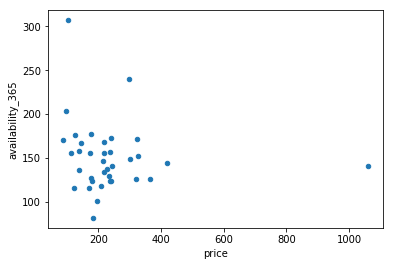

In [126]:
price_avail.plot(kind = 'scatter', x = 'price', y = 'availability_365')
# Maybe I need to group these neighbourhoods into bigger district.

In [150]:
df.minimum_nights.value_counts().sort_values()

8               1
17              1
13              1
9               1
85              1
185             1
100000000       1
1000            1
140             1
120             1
1125            1
190             1
28              1
365             1
12              1
999             2
25              2
29              3
180             3
15              3
21              4
60              5
90              5
14              6
10             10
32             19
6              32
31             53
7              65
5             178
4             237
30            657
3             872
1            1235
2            1398
Name: minimum_nights, dtype: int64

In [159]:
df.minimum_nights.median()

2.0

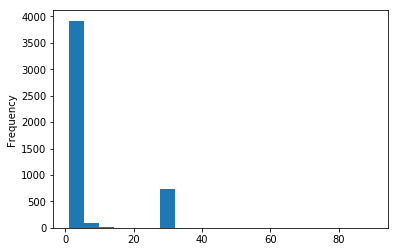

In [90]:
df[df.minimum_nights<100]['minimum_nights'].plot(kind='hist', bins=20)

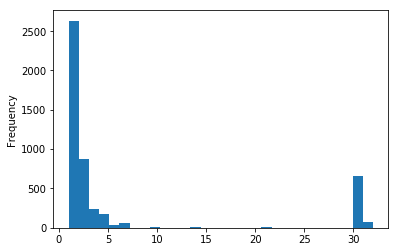

In [93]:
df[df.minimum_nights<50]['minimum_nights'].plot(kind='hist', bins=30)

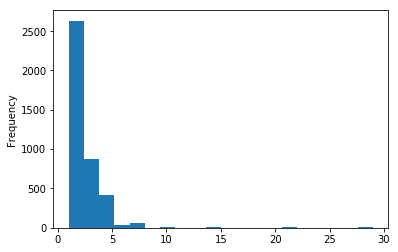

In [95]:
df[df.minimum_nights<30]['minimum_nights'].plot(kind='hist', bins=20)

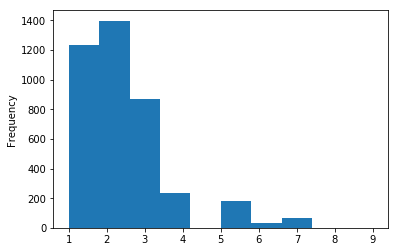

In [97]:
df[df.minimum_nights<10]['minimum_nights'].plot(kind='hist', bins=10)

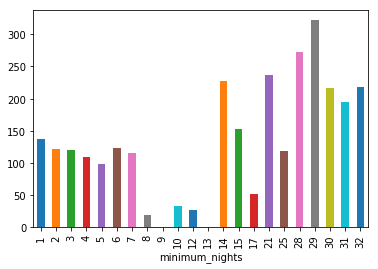

In [148]:
df[df.minimum_nights<35].groupby('minimum_nights')['availability_365'].mean().plot(kind = 'bar')

In [192]:
df1 = df[df.availability_365 == 0]
df2 = df1[df1['number_of_reviews'] == 0]
df2.shape
# There are 69 entries that are not active listings.

(69, 16)

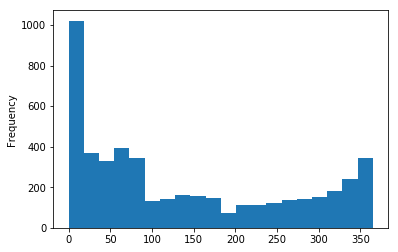

In [99]:
df['availability_365'].plot(kind='hist',bins=20)

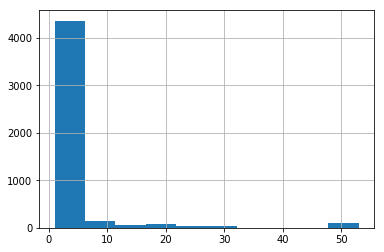

In [129]:
df['calculated_host_listings_count'].hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

In [8]:
import matplotlib.pyplot as plt

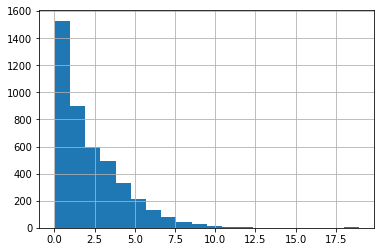

In [104]:
# Visualize the distribution of reviews per month
df[df.reviews_per_month<20]['reviews_per_month'].hist(bins=20)

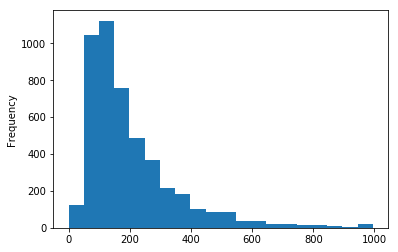

In [109]:
# Visualize the distribution of price
df[df.price<1000].price.plot(kind='hist', bins=20)

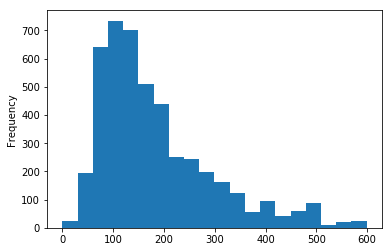

In [110]:
df[df.price<600].price.plot(kind='hist', bins=20)

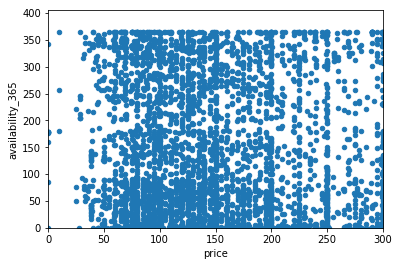

In [21]:
df.plot(kind='scatter', x='price', y='availability_365',xlim=(0,300), ylim=(0,405))

In [22]:
entire_home = df[df['room_type'] == 'Entire home/apt']
private_room = df[df['room_type'] == 'Private room']

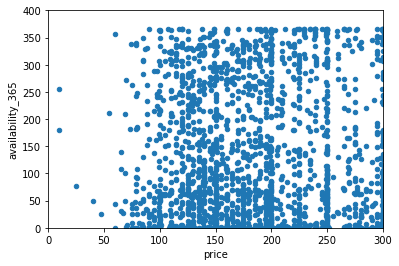

In [25]:
entire_home.plot(kind='scatter', x='price', y='availability_365',xlim=(0,300), ylim=(0,400))

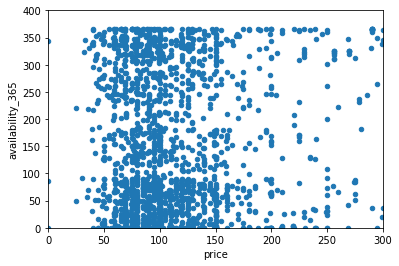

In [26]:
private_room.plot(kind='scatter', x='price', y='availability_365', xlim=(0,300), ylim=(0,400))

In [1]:
url_cal='http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/calendar.csv.gz'

In [3]:
import pandas as pd

In [24]:
df_cal = pd.read_csv(url_cal, sep=',',encoding = 'utf-8')

In [25]:
df_booking = df_cal[df_cal['available']!='f']

In [26]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753460 entries, 0 to 1753459
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 53.5+ MB


In [135]:
df_booking[df_booking['listing_id'] == 6938818]

,listing_id,date,available,price
29,6938818,2018-11-11,t,$69.00
30,6938818,2018-11-10,t,$69.00
31,6938818,2018-11-09,t,$69.00
32,6938818,2018-11-08,t,$69.00
33,6938818,2018-11-07,t,$69.00
34,6938818,2018-11-06,t,$69.00
35,6938818,2018-11-05,t,$69.00
36,6938818,2018-11-04,t,$69.00
133,6938818,2018-07-30,t,$80.00
134,6938818,2018-07-29,t,$88.00


In [130]:
df[df['id'] == 6938818]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1741,6938818,Best Secret in Town,36381578,Harris,NaN,Seacliff,37.780659,-122.505635,Private room,69,3,72,2018-01-20,2.2,3,44


In [30]:
url_rev = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/reviews.csv.gz'

In [33]:
df_rev = pd.read_csv(url_rev, sep=',')

In [38]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Ted,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [35]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233230 entries, 0 to 233229
Data columns (total 6 columns):
listing_id       233230 non-null int64
id               233230 non-null int64
date             233230 non-null object
reviewer_id      233230 non-null int64
reviewer_name    233229 non-null object
comments         233056 non-null object
dtypes: int64(3), object(3)
memory usage: 10.7+ MB


In [37]:
url_listing = 'http://data.insideairbnb.com/united-states/ca/san-francisco/2018-03-04/data/listings.csv.gz'

In [39]:
df_listing = pd.read_csv(url_listing, sep=',')

In [40]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20180303203625,2018-03-04,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1.21
1,5858,https://www.airbnb.com/rooms/5858,20180303203625,2018-03-04,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,1,1.04
2,7918,https://www.airbnb.com/rooms/7918,20180303203625,2018-03-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,7,0.16
3,8014,https://www.airbnb.com/rooms/8014,20180303203625,2018-03-04,Newly Remodeled room in big house WIFI market,Freshly painted newly done laminate floor with...,The room is recently painted in the color of c...,Freshly painted newly done laminate floor with...,none,"The neighborhood is very residential, close to...",...,t,STR-0000974,"{""SAN FRANCISCO""}",t,f,moderate,f,f,3,1.12
4,8142,https://www.airbnb.com/rooms/8142,20180303203625,2018-03-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict,f,f,7,0.16


In [41]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [45]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 96 columns):
id                                  4804 non-null int64
listing_url                         4804 non-null object
scrape_id                           4804 non-null int64
last_scraped                        4804 non-null object
name                                4804 non-null object
summary                             4645 non-null object
space                               4148 non-null object
description                         4802 non-null object
experiences_offered                 4804 non-null object
neighborhood_overview               3655 non-null object
notes                               3138 non-null object
transit                             3756 non-null object
access                              3707 non-null object
interaction                         3558 non-null object
house_rules                         3841 non-null object
thumbnail_url                       0 no

In [44]:
df_listing.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4.804000e+03,4.804000e+03,0.0,0.0,0.0,4.804000e+03,0.0,4776.000000,4776.000000,0.0,...,4804.000000,4370.000000,4369.000000,4370.000000,4368.000000,4369.000000,4368.000000,4367.000000,4804.000000,4381.000000
mean,1.125361e+07,2.018030e+13,NaN,NaN,NaN,3.357978e+07,NaN,6.085008,6.085008,NaN,...,49.912781,95.787872,9.794232,9.673684,9.890110,9.883040,9.631639,9.496909,3.766861,2.351408
std,7.709818e+06,1.148557e+00,NaN,NaN,NaN,4.601828e+07,NaN,20.546652,20.546652,NaN,...,68.268786,5.354162,0.499087,0.626834,0.396126,0.384341,0.617341,0.645238,8.083173,3.304190
min,9.580000e+02,2.018030e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.020000
25%,3.812677e+06,2.018030e+13,NaN,NaN,NaN,3.052907e+06,NaN,1.000000,1.000000,NaN,...,6.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.600000
50%,1.090908e+07,2.018030e+13,NaN,NaN,NaN,1.133110e+07,NaN,2.000000,2.000000,NaN,...,23.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.610000
75%,1.855375e+07,2.018030e+13,NaN,NaN,NaN,4.414355e+07,NaN,3.000000,3.000000,NaN,...,66.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,3.330000
max,2.359468e+07,2.018030e+13,NaN,NaN,NaN,1.762662e+08,NaN,964.000000,964.000000,NaN,...,568.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,53.000000,110.080000
